In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train_data.csv')

In [3]:
data

,size,price
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900
5,1534,314900
6,1427,198999
7,1380,212000
8,1494,242500
9,1940,239999


In [4]:
data.head()

,size,price
0,1600,329900
1,2400,369000
2,1416,232000
3,3000,539900
4,1985,299900


In [5]:
data.describe()

,size,price
count,46.000000,46.000000
mean,1998.434783,339119.456522
std,803.333019,126103.418369
min,852.000000,169900.000000
25%,1429.500000,249900.000000
50%,1870.000000,299900.000000
75%,2284.500000,368875.000000
max,4478.000000,699900.000000


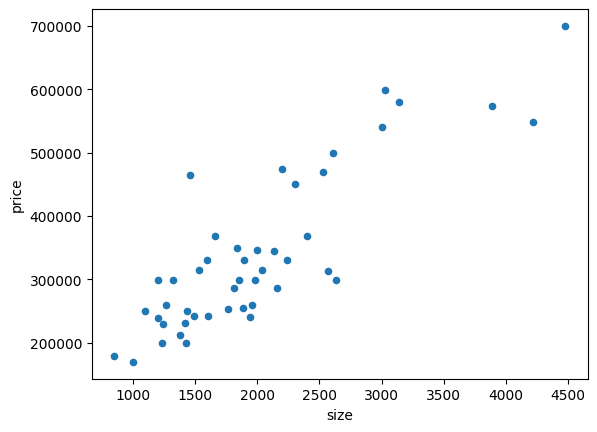

In [7]:
#scatter plot
data.plot(x='size', y='price', kind='scatter')
plt.show()

In [8]:
# We will use Feature scaling and Mean Normalization techniques that will be helpful for gradient descent
# as gradient descent will descned quickly on small ranges and slowly on large ranges, so we want all the values to be roughly in the same range

# Using feature scaling: dividing input values by range (max-min value) of input var

data = (data - np.mean(data))/np.std(data)                   #formula for feature scaling:  new var value = (old value - mean(whole data))/ standard_deviation(whole data)


In [9]:
data.describe()

,size,price
count,4.600000e+01,4.600000e+01
mean,-1.303305e-16,-3.620292e-17
std,1.011050e+00,1.011050e+00
min,-1.442867e+00,-1.356738e+00
25%,-7.160437e-01,-7.153282e-01
50%,-1.616440e-01,-3.144469e-01
75%,3.600328e-01,2.385688e-01
max,3.120704e+00,2.892604e+00


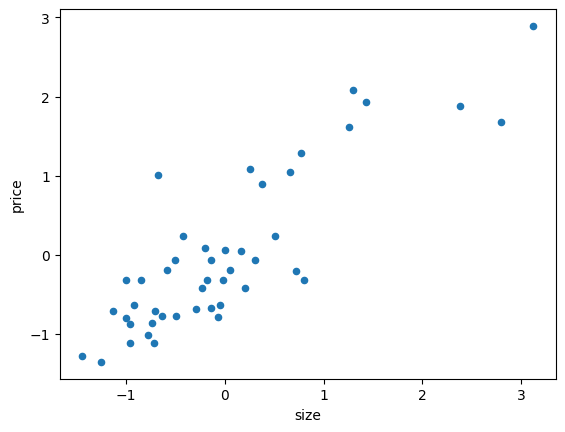

In [11]:
# now again, scatter plot:
data.plot(x='size', y='price', kind='scatter')
plt.show()

In [12]:
# initializing the theta matrix(parameters)  randomly:

# theta=np.matrix(np.array[0,0])

theta= np.random.randn(1,2)    # random values between 1 and 2

In [18]:
# INSERTING COLUMN OF ONES:

# SINCE WE HAVE ONLY TWO VARIABLES, WE HAVE TWO PARAMETERS theta[0] and theta[1] and our hypothesis function looks like:

# h(x) = theta[0] + theta[1] * data[x]

# which can also be written as:  h(x) = theta[0] * 1 + theta[1] * data[x]

# thus adding a column of ones will givs us the required dot product for the hypothesis function

data.insert(0, 'Ones', 1)              #insert at 0th position
data.head()

,Ones,size,price
0,1,-0.501458,-0.073918
1,1,0.505398,0.239571
2,1,-0.733034,-0.858844
3,1,1.260539,1.609783
4,1,-0.016909,-0.314447


In [21]:
x = data.iloc[:,0:2]
x.head()

,Ones,size
0,1,-0.501458
1,1,0.505398
2,1,-0.733034
3,1,1.260539
4,1,-0.016909


In [22]:
y= data['price']
y.head()

0   -0.073918
1    0.239571
2   -0.858844
3    1.609783
4   -0.314447
Name: price, dtype: float64

In [23]:
x = np.matrix(x)
y = np.matrix(y)
y = y.T

In [24]:
x.shape, theta.shape, y.shape

((46, 2), (1, 2), (46, 1))

In [25]:
theta

array([[ 0.81229916, -0.60740058]])

In [27]:
# CALUCULATING COST/ERROR/LOSS FUNCTION:

def computeCost(x, y, theta):
    # initialize values
    m = 46   # total number of training examples
    J = 0   # initial cost
    h = np.matmul(x, theta.T)   # here we need to take transpose of theta for matrix multiplication
    J= (1/ (2 * m)) *  np.sum( np.square(h-y))    # formula for cost function
    return J

In [28]:
computeCost(x,y,theta)

1.5342740226699445

In [33]:
# GRADIENT DESCENT FUNCTION

def gradientDescent(x, y, theta, num_iters,lr):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `lr`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m , n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m,1 ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (1,n+1 ).
        
    lr : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (1,n+1 ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(num_iters)
    
    for i in range(num_iters):
        h = np.matmul(x, theta.T)
        error = h-y
        for j in range(2):
            term = np.multiply(error, x[:,j])
            temp[0,j] = theta[0,j] - ((lr/ len(x)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(x, y, theta)
        
    return theta, cost

In [34]:
# REDUCING THE COST/ERROR/LOSS USING GRADIENT DESCENT:

number_of_iterations = 250   # these many times gradient descent will be applied
new_theta , cost  = gradientDescent(x, y, theta, number_of_iterations, lr=0.1)    # here, lr = learning rate or alpha
print(new_theta, cost)

[[2.95360831e-12 8.55928253e-01]] [1.26816371 1.05261435 0.87801937 0.73659744 0.62204568 0.52925875
 0.45410133 0.39322383 0.34391305 0.30397132 0.27161852 0.24541275
 0.22418607 0.20699247 0.19306565 0.18178492 0.17264754 0.16524625
 0.15925121 0.15439523 0.15046189 0.14727588 0.14469521 0.14260487
 0.14091169 0.13954022 0.13842932 0.1375295  0.13680064 0.13621027
 0.13573207 0.13534472 0.13503097 0.13477684 0.13457099 0.13440425
 0.13426919 0.13415979 0.13407118 0.1339994  0.13394127 0.13389417
 0.13385603 0.13382513 0.13380011 0.13377983 0.13376341 0.13375011
 0.13373934 0.13373061 0.13372355 0.13371782 0.13371318 0.13370943
 0.13370638 0.13370392 0.13370192 0.13370031 0.133699   0.13369794
 0.13369708 0.13369638 0.13369582 0.13369536 0.13369499 0.13369469
 0.13369445 0.13369425 0.13369409 0.13369396 0.13369386 0.13369377
 0.13369371 0.13369365 0.1336936  0.13369357 0.13369354 0.13369351
 0.1336935  0.13369348 0.13369347 0.13369346 0.13369345 0.13369344
 0.13369344 0.13369343 0.133

In [35]:
Model_price = new_theta[0,0] + (new_theta[0,1] * x)   # according to our hypothesis function

Text(0.5, 1.0, 'Predicted price vs Size')

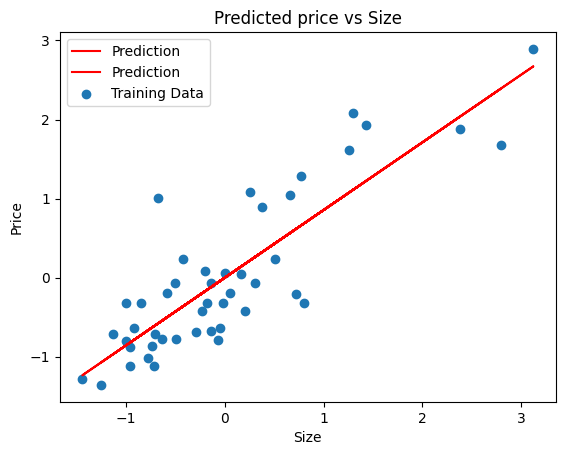

In [39]:
# plotting graph
fig, ax = plt.subplots()
ax.plot(x, Model_price, 'r', label='Prediction')
ax.scatter(data['size'], data.price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted price vs Size')

Text(0.5, 1.0, 'Cost v/s Number of Iterations')

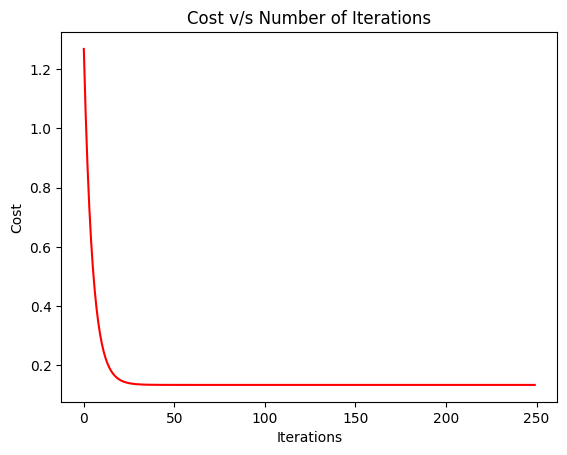

In [42]:
# plotting a graph between cost function vs number of iterations
fig, ax = plt.subplots()
ax.plot(np.arange(number_of_iterations), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost v/s Number of Iterations')

In [43]:
# It is advised to keep your lr or learning rate or alpha suitably (not too low or not too high) otherwise the function may overshoot or grow slowly